# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

#Create DF for results
weather_df = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})
weather_df.head()

640
640


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,port-cartier,,CA,,,,,,
1,albany,,AU,,,,,,
2,jamestown,,SH,,,,,,
3,berbera,,SO,,,,,,
4,hualmay,,PE,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
record_num = 1
set_num = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
Beginning Data Retrieval
-----------------------------''')
for index, row in weather_df.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {set_num} | {response["name"]}')
        
        #Input data into the dataframe
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        set_num += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Port-Cartier
Processing Weather Data for Record 2 of Set 1 | Albany
Processing Weather Data for Record 3 of Set 1 | Jamestown
Processing Weather Data for Record 4 of Set 1 | Berbera
Processing Weather Data for Record 5 of Set 1 | Hualmay
Processing Weather Data for Record 6 of Set 1 | Kitimat
Processing Weather Data for Record 7 of Set 1 | Mariental
Processing Weather Data for Record 8 of Set 1 | Rikitea
Processing Weather Data for Record 9 of Set 1 | Ullapool
Processing Weather Data for Record 10 of Set 1 | New Norfolk
Processing Weather Data for Record 11 of Set 1 | Bluff
Processing Weather Data for Record 12 of Set 1 | Córdoba
Processing Weather Data for Record 13 of Set 1 | Ribeira Grande
Processing Weather Data for Record 14 of Set 1 | Clyde River
Processing Weather Data for Record 15 of Set 1 | Dikson
Processing Weather Data for Record 16 of Set 1 | Ushuaia
Processing Weather D

Processing Weather Data for Record 33 of Set 3 | Tukums
Processing Weather Data for Record 34 of Set 3 | Kirakira
Processing Weather Data for Record 35 of Set 3 | Belmonte
Processing Weather Data for Record 36 of Set 3 | Bambous Virieux
Processing Weather Data for Record 37 of Set 3 | Khuzdar
Processing Weather Data for Record 38 of Set 3 | Synya
Processing Weather Data for Record 39 of Set 3 | Zeya
Processing Weather Data for Record 40 of Set 3 | Iqaluit
Processing Weather Data for Record 41 of Set 3 | Staryy Nadym
City not found....Skipping............
Processing Weather Data for Record 42 of Set 3 | Pisco
Processing Weather Data for Record 43 of Set 3 | Castro
City not found....Skipping............
Processing Weather Data for Record 44 of Set 3 | Porto Velho
Processing Weather Data for Record 45 of Set 3 | Mahon
Processing Weather Data for Record 46 of Set 3 | Mnogovershinnyy
Processing Weather Data for Record 47 of Set 3 | Leh
Processing Weather Data for Record 48 of Set 3 | Sitka


Processing Weather Data for Record 14 of Set 6 | Deer Lake
Processing Weather Data for Record 15 of Set 6 | Seddon
Processing Weather Data for Record 16 of Set 6 | Terre Haute
Processing Weather Data for Record 17 of Set 6 | Ampanihy
Processing Weather Data for Record 18 of Set 6 | Kochkurovo
Processing Weather Data for Record 19 of Set 6 | Rundu
Processing Weather Data for Record 20 of Set 6 | Kokopo
Processing Weather Data for Record 21 of Set 6 | Shelopugino
Processing Weather Data for Record 22 of Set 6 | Hasaki
Processing Weather Data for Record 23 of Set 6 | Vardø
Processing Weather Data for Record 24 of Set 6 | Abilene
Processing Weather Data for Record 25 of Set 6 | Winnemucca
Processing Weather Data for Record 26 of Set 6 | Maţāy
Processing Weather Data for Record 27 of Set 6 | Dunedin
Processing Weather Data for Record 28 of Set 6 | Jinka
Processing Weather Data for Record 29 of Set 6 | Mabaruma
Processing Weather Data for Record 30 of Set 6 | Tselinnoye
Processing Weather Da

Processing Weather Data for Record 43 of Set 8 | Boda
Processing Weather Data for Record 44 of Set 8 | Novoagansk
Processing Weather Data for Record 45 of Set 8 | Ternate
Processing Weather Data for Record 46 of Set 8 | Fortuna
Processing Weather Data for Record 47 of Set 8 | São Félix do Xingu
Processing Weather Data for Record 48 of Set 8 | Pemangkat
Processing Weather Data for Record 49 of Set 8 | Shymkent
Processing Weather Data for Record 50 of Set 8 | Bambanglipuro
Processing Weather Data for Record 1 of Set 9 | Pandamatenga
City not found....Skipping............
Processing Weather Data for Record 2 of Set 9 | Necochea
Processing Weather Data for Record 3 of Set 9 | Santiago
Processing Weather Data for Record 4 of Set 9 | Evanston
Processing Weather Data for Record 5 of Set 9 | Manaus
Processing Weather Data for Record 6 of Set 9 | Vanimo
Processing Weather Data for Record 7 of Set 9 | Taganak
City not found....Skipping............
Processing Weather Data for Record 8 of Set 9 | 

Processing Weather Data for Record 22 of Set 11 | Kushikino
City not found....Skipping............
Processing Weather Data for Record 23 of Set 11 | Alausí
Processing Weather Data for Record 24 of Set 11 | Marabu
City not found....Skipping............
Processing Weather Data for Record 25 of Set 11 | Thap Than
Processing Weather Data for Record 26 of Set 11 | Kaeo
City not found....Skipping............
Processing Weather Data for Record 27 of Set 11 | Husavik
Processing Weather Data for Record 28 of Set 11 | Eyl
Processing Weather Data for Record 29 of Set 11 | Illapel
Processing Weather Data for Record 30 of Set 11 | Huarmey
Processing Weather Data for Record 31 of Set 11 | Wanning
Processing Weather Data for Record 32 of Set 11 | Uk
Processing Weather Data for Record 33 of Set 11 | Broken Hill
Processing Weather Data for Record 34 of Set 11 | Sæby
Processing Weather Data for Record 35 of Set 11 | Namuac
Processing Weather Data for Record 36 of Set 11 | Prescott
Processing Weather Dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Clean df to remove cities that were not found
weather_df['Max Temp'] = weather_df['Max Temp'].replace('', np.nan)
weather_df = weather_df.dropna()

#Save df
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

#See the df
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,port-cartier,75,CA,1596678364,100,50.03,-66.87,62.01,6.93
1,albany,75,AU,1596678364,66,-35.02,117.89,53.60,8.05
2,jamestown,100,SH,1596678364,85,-15.94,-5.72,62.38,20.58
3,berbera,100,SO,1596678364,47,10.44,45.01,88.63,21.61
4,hualmay,15,PE,1596678365,83,-11.1,-77.61,58.55,7.83


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humidity_list = weather_df["Humidity"] > 100
humidity_list.value_counts()
#No cities over 100 Humidity

False    572
Name: Humidity, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

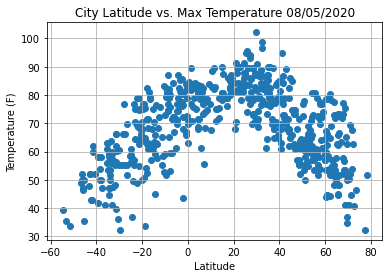

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

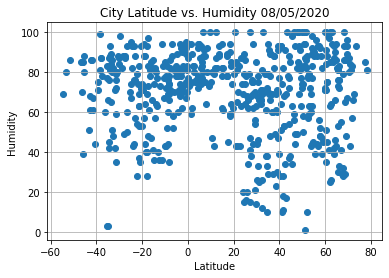

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

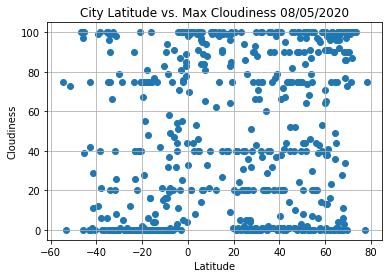

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

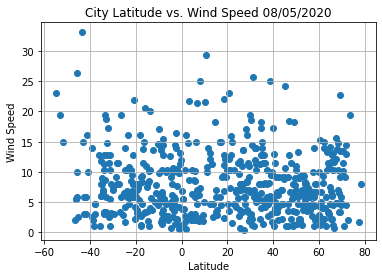

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression